# Try to somehow get all the components>

We know that 
$$(\delta p_{kin})^2 \equiv (\delta p)^2 + (gA)^2 - 2g\delta p \delta A = p_{kin}^2 - p_0^2 - g^2 A^2 - 2p_0\delta p - 2g^2 A_0 \delta_A + 2gp_0A_0 + 2gp_0\delta A +2g\delta p A_0$$
so taking expectation values and after some algebra, where one has to take into account that some of the terms will vanish, it is possible to get to
$$ <(\delta p_{kin})^2> = <p_{kin}^2> - <p_0^2> - g^2<A^2> - 2g^2<A_0 \delta A> + 2g<\delta p A> - 2g<\delta p \delta A>$$

### Import the simulation results

In [1]:
# We create a list with the files to read

Nevs = 100; Nc = 3

A_file_list = [['/lustre/HQCD/carlos.lamas/qJetLFH_vQM/output/A_results/result_{%i}_OUTPUT_VGlasma_nophase_R_q_g_1.000_WF_Init_q_Gaussian_nPx0_nPy0_wx_10.000000_wy_10.000000_cQ_%i_hQ_1_mq0_0.100_mq_0.100_mg_0.150_Lperp_2_Nperp_64_Leta_2.500000_Neta_1_Lmin_10.00_Kmax_2_g2mu_0.000_onMPIrank_0_step_32/PIperp/evolution_Piperp_sq_exp_autonomy.dat' %(nev, nc) for nev in range(Nevs)] for nc in range(1, Nc+1)]
delta_A_file_list = [['/lustre/HQCD/carlos.lamas/qJetLFH_vQM/output/delta_A_results/result_{%i}_OUTPUT_VGlasma_nophase_R_q_g_1.000_WF_Init_q_Gaussian_nPx0_nPy0_wx_10.000000_wy_10.000000_cQ_%i_hQ_1_mq0_0.100_mq_0.100_mg_0.150_Lperp_2_Nperp_64_Leta_2.500000_Neta_1_Lmin_10.00_Kmax_2_g2mu_0.000_onMPIrank_0_step_32/PIperp/evolution_Piperp_sq_exp_autonomy.dat' %(nev, nc) for nev in range(Nevs)] for nc in range(1, Nc+1)]


In [2]:
# We convert to an array of DataFrames

import pandas as pd 
import numpy as np

A_df_list = []
delta_A_df_list = []

for i in range(Nevs):
    A_df = [pd.read_table(A_file_list[c][i], header = None) for c in range(Nc)]
    A_df_list.append(A_df)
    
    delta_A_df = [pd.read_table(delta_A_file_list[c][i], header = None) for c in range(Nc)]
    delta_A_df_list.append(delta_A_df)
    
    

A_data = np.array(A_df_list)
delta_A_data = np.array(delta_A_df_list)

print(A_data.shape, delta_A_data.shape)



(100, 3, 33, 9) (100, 3, 33, 9)


In [4]:
# Average over color and configurations

A_data_av = np.average(A_data, axis=(0,1))
delta_A_data_av = np.average(delta_A_data, axis=(0,1))

In [ ]:
# Extract the desired components

xplus = A_data_av[:, 0]

py2 = A_data_av[:, 5]
pz2 = A_data_av[:, 1]

Ay2 = A_data_av[:, 6]
Az2 = A_data_av[:, 2]

pyAy = A_data_av[:, 7]
pzAz = A_data_av[:, 3]

pydeltaAy = delta_A_data_av[:, 7]
pzdeltAz = delta_A_data_av[:, 3]

In [8]:
print(pkin_y2)

[80.06975033 80.06975033 80.06647033 80.10673333 80.18678367 80.30112967
 80.44366133 80.60856033 80.79059367 80.98469233 81.18538433 81.38693433
 81.584097   81.77221367 81.946675   82.102962   82.23764867 82.34961567
 82.44081267 82.51595133 82.581168   82.64266433 82.70607533 82.77594767
 82.854963   82.943402   83.03947367 83.13992767 83.24037567 83.33565667
 83.42064367 83.49144167 83.54633767]


### Plot the results

Text(0, 0.5, '$<p_{kin}^2>$')

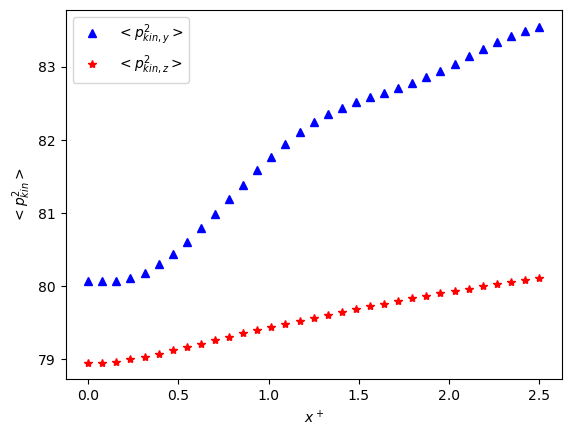

In [12]:
# Start with <p_{kin}^2>

import matplotlib.pyplot as plt

plt.plot(xplus, pkin_y2, 'b^', label = r'$<p_{kin, y}^2>$')
plt.plot(xplus, pkin_z2, 'r*', label = r'$<p_{kin, z}^2>$')

plt.legend()

plt.xlabel(r'$x^+$')
plt.ylabel(r'$<p_{kin}^2>$')